In [1]:
%cd ..

/home/dani2442/Projects/Functional-Data-Analysis


In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from main import ffpca, fpca

In [3]:
import os
for dirname, _, filenames in os.walk('data/esa-adb-challenge'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/esa-adb-challenge/target_channels.csv
data/esa-adb-challenge/train.pkl
data/esa-adb-challenge/sample_submission.parquet
data/esa-adb-challenge/test.parquet
data/esa-adb-challenge/train.parquet
data/esa-adb-challenge/test.pkl


In [4]:
# Load all channels and show stats
#train_df = pd.read_parquet("data/esa-adb-challenge/train.parquet")
#train_df.to_pickle("data/esa-adb-challenge/train.pkl")

#test_df = pd.read_parquet("data/esa-adb-challenge/test.parquet")
#test_df.to_pickle("data/esa-adb-challenge/test.pkl")

In [5]:
train_df = pd.read_pickle("data/esa-adb-challenge/train.pkl")
test_df = pd.read_pickle("data/esa-adb-challenge/test.pkl")

In [6]:
train_df.columns

Index(['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12',
       'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17',
       'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21',
       'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26',
       'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30',
       'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35',
       'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4',
       'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44',
       'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49',
       'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53',
       'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58',
       'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62',
       'channel_63', 'channel_64', 'channel_65', 'channel_66', 'channel_67',
       'chann

In [23]:
train_df.describe()

In [46]:
channel_names = [f"channel_{x}" for x in range(41,50)]
#channel_names = [x for x in train_df.columns if x not in ["id", "is_anomaly"]]

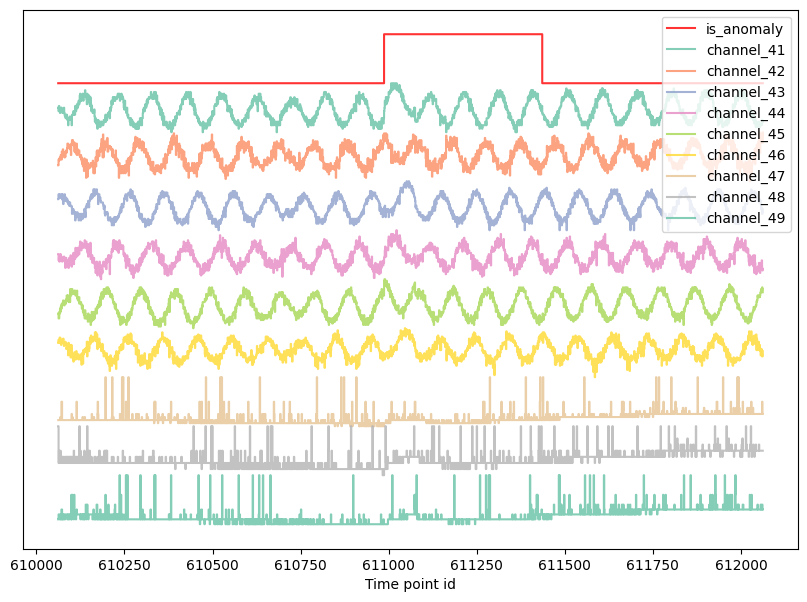

In [47]:
plt.rcParams["image.cmap"] = "Set2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
plt.figure(figsize=(10,7))

start_idx = 610062
end_idx = start_idx + 2000

plt.step(train_df.loc[start_idx:end_idx, "id"], train_df.loc[start_idx:end_idx, "is_anomaly"] + 1, alpha=0.8, label="is_anomaly", where="post", color="red")

for i, channel in enumerate(channel_names):
    d = train_df.loc[start_idx:end_idx, channel]
    d = (d - np.min(d))/(np.max(d) - np.min(d))

    plt.step(train_df.loc[start_idx:end_idx, "id"], d - i, alpha=0.8, label=channel, where="post")

plt.xlabel("Time point id")
plt.yticks([], [])
plt.legend(loc="upper right")